In [21]:
import os, json
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib

color0 = "#B81F1F"
color1 = "#2368A2"

from matplotlib import rc
rc('text', usetex=True)

from monty.json import MontyEncoder, MontyDecoder
from vscworkflows.tools.optics import SolarCell

figures_dir = "../../figures/slme/"

# The curious case of CA-CuInSe2

In [22]:
solar_CuInSe2 = SolarCell.from_file("data/CuInSe2_nedos6000.xml")
solar_CuGaS2 = SolarCell.from_file("data/CuGaS2_nedos2000.xml")

/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:155: UserWarning: Float overflow (*******) encountered in vasprun
  warnings.warn('Float overflow (*******) encountered in vasprun')


In [23]:
solar_CuInSe2.shift_bandgap_to(0.58)

First, let's compare the thickness dependence of the efficiency for the two materials.

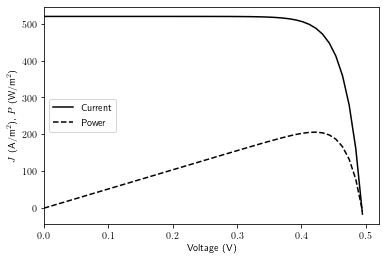

In [24]:
fig, ax = plt.subplots()

solar_CuInSe2.get_iv_curve(iv_mesh=0.01, add_to_axis=ax)

ax.set_xlabel("Voltage (V)")
ax.set_xlim([0, 0.52])
ax.set_ylabel(r"$J$ (A/m$^2$), $P$ (W/m$^2$)")
ax.legend(["Current", "Power"])
tikzplotlib.save(filepath=os.path.join(figures_dir, "IV_curve.tex"), 
                 add_axis_environment=False)

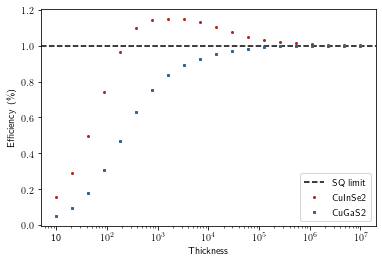

In [25]:
fig, ax = plt.subplots()

ax.axhline(1, color="k", linestyle="--")

thickness = 10 ** np.linspace(-8, -2, 20)
slme_data = np.array(
    [solar_CuInSe2.slme(thickness=d)
     for d in thickness]
)
sq = solar_CuInSe2.calculate_bandgap_sq()

ax.plot(thickness, [d[0]/sq[0] for d in slme_data], "o", 
        markersize=2, color=color0)

slme_data = np.array(
    [solar_CuGaS2.slme(thickness=d)
     for d in thickness]
)
sq = solar_CuGaS2.calculate_bandgap_sq()

ax.plot(thickness, [d[0]/sq[0] for d in slme_data], "s", 
        markersize=2, color=color1)

ax.set_xscale("log")
ax.legend(["SQ limit", "CuInSe2", "CuGaS2"])
ax.set_xlabel("Thickness")
ax.set_ylabel("Efficiency (\%)")
ax.set_xticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2])
ax.set_xticklabels(["10", "$10^2$", "$10^3$", "$10^4$", "$10^5$", "$10^6$", "$10^7$"]);
tikzplotlib.save(filepath=os.path.join(figures_dir, "SLME_thickness.tex"), 
                 add_axis_environment=False)

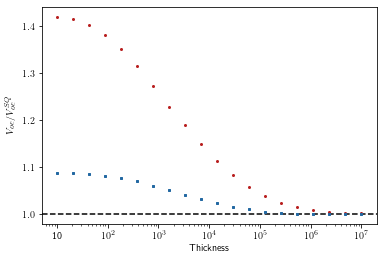

In [26]:
fig, ax = plt.subplots()

ax.axhline(1, color="k", linestyle="--")

thickness = 10 ** np.linspace(-8, -2, 20)
slme_data = np.array(
    [solar_CuInSe2.slme(thickness=d)
     for d in thickness]
)
sq = solar_CuInSe2.calculate_bandgap_sq()

ax.plot(thickness, [d[1]/sq[1] for d in slme_data], "o", 
        markersize=2, color=color0)

slme_data = np.array(
    [solar_CuGaS2.slme(thickness=d)
     for d in thickness]
)
sq = solar_CuGaS2.calculate_bandgap_sq()

ax.plot(thickness, [d[1]/sq[1] for d in slme_data], "s",
        markersize=2, color=color1)

ax.set_xscale("log")
ax.set_xlabel("Thickness")
ax.set_ylabel("$V_{oc} /  V_{oc}^{SQ}$")
ax.set_xticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2])
ax.set_xticklabels(["10", "$10^2$", "$10^3$", "$10^4$", "$10^5$", "$10^6$", "$10^7$"]);
tikzplotlib.save(filepath=os.path.join(figures_dir, "Voc_thickness.tex"), 
                 add_axis_environment=False)

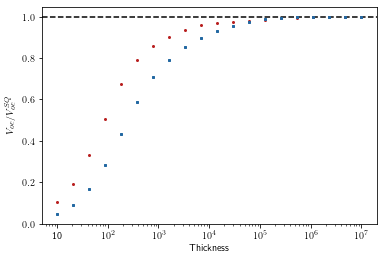

In [8]:
fig, ax = plt.subplots()

ax.axhline(1, color="k", linestyle="--")

thickness = 10 ** np.linspace(-8, -2, 20)
slme_data = np.array(
    [solar_CuInSe2.slme(thickness=d)
     for d in thickness]
)
sq = solar_CuInSe2.calculate_bandgap_sq()

ax.plot(thickness, [d[2]/sq[2] for d in slme_data], "o", 
        markersize=2, color=color0)

slme_data = np.array(
    [solar_CuGaS2.slme(thickness=d)
     for d in thickness]
)
sq = solar_CuGaS2.calculate_bandgap_sq()

ax.plot(thickness, [d[2]/sq[2] for d in slme_data], "s", 
        markersize=2, color=color1)

ax.set_xscale("log")
ax.set_xlabel("Thickness")
ax.set_ylabel("$J_{sc} /  J_{sc}^{SQ}$")
ax.set_xticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2])
ax.set_xticklabels(["10", "$10^2$", "$10^3$", "$10^4$", "$10^5$", "$10^6$", "$10^7$"]);
tikzplotlib.save(filepath=os.path.join(figures_dir, "Jsc_thickness.tex"), 
                 add_axis_environment=False)

J_0^SQ 0.00023536164906273613
J_0^SQ 3.236380685582544e-23


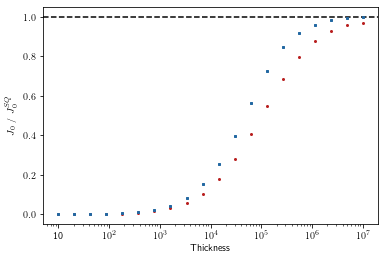

In [10]:
fig, ax = plt.subplots()

ax.axhline(1, color="k", linestyle="--")

thickness = 10 ** np.linspace(-8, -2, 20)
slme_data = np.array(
    [solar_CuInSe2.slme(thickness=d)
     for d in thickness]
)
sq = solar_CuInSe2.calculate_bandgap_sq()
print("J_0^SQ", sq[3])

ax.plot(thickness, [d[3]/sq[3] for d in slme_data], "o", 
        markersize=2, color=color0)

slme_data = np.array(
    [solar_CuGaS2.slme(thickness=d)
     for d in thickness]
)
sq = solar_CuGaS2.calculate_bandgap_sq()
print("J_0^SQ", sq[3])

ax.plot(thickness, [d[3]/sq[3] for d in slme_data], "s",
        markersize=2, color=color1)

ax.set_xscale("log")
ax.set_xlabel("Thickness")
ax.set_ylabel("$J_0$ / $J_0^{SQ}$")c
ax.set_xticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2])
ax.set_xticklabels(["10", "$10^2$", "$10^3$", "$10^4$", "$10^5$", "$10^6$", "$10^7$"]);
tikzplotlib.save(filepath=os.path.join(figures_dir, "J0_thickness.tex"), 
                 add_axis_environment=False)

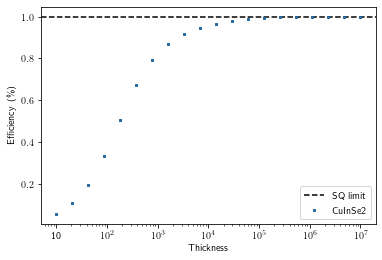

In [20]:
fig, ax = plt.subplots()

thickness = 10 ** np.linspace(-8, -2, 20)
ax.axhline(1, color="k", linestyle="--")

slme_data = np.array(
    [solar_CuGaS2.slme(thickness=d, temperature=600)
     for d in thickness]
)
sq = solar_CuGaS2.calculate_bandgap_sq(temperature=600)

ax.plot(thickness, [d[0]/sq[0] for d in slme_data], "s", 
        markersize=2, color=color1)

ax.set_xscale("log")
ax.legend(["SQ limit", "CuInSe2", "CuGaS2"])
ax.set_xlabel("Thickness")
ax.set_ylabel("Efficiency (\%)")
ax.set_xticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2])
ax.set_xticklabels(["10", "$10^2$", "$10^3$", "$10^4$", "$10^5$", "$10^6$", "$10^7$"]);
# tikzplotlib.save(filepath=os.path.join(figures_dir, "SLME_thickness.tex"), 
#                  add_axis_environment=False)